In [1]:
# %matplotlib qt
import pickle
from pylab import *
import networkx as nx

In [2]:
def loadFile(name):
    with open(name,"rb") as f:
        return pickle.load(f)

In [3]:
g = loadFile('../0_map_data_processed/edges_list.p')
nodexy = loadFile('../0_map_data_processed/node_xy.p')
windows = loadFile('../3_windowing_the_map/map_windows/windows.p')
params = loadFile('../3_windowing_the_map/map_windows/data.p')
x_offset = params['x_offset']
y_offset = params['y_offset']
x_window = params['x_window']
y_window = params['y_window']

In [4]:
G = nx.Graph()
G.add_weighted_edges_from(g)

In [5]:
# '3897890813', '431610692'
s = '3897890813'; e = '1614268208' # choosing some random two nodes
path = nx.shortest_path(G,s,e, weight='weight')
length = nx.shortest_path_length(G,s,e, weight='weight')
print('The path has ',len(path),' nodes')
print(length)

The path has  138  nodes
6604.786551913811


## Visualizing the path

In [9]:
l = len(path); wins = {}
print('No. of windows to print :')
for x in path:
    x_w = (int(nodexy[x][0])-x_offset)//x_window
    y_w = (int(nodexy[x][1])-y_offset)//y_window
    if(str(x_w)+'_'+str(y_w) not in wins):
        wins[str(x_w)+'_'+str(y_w)] = True
print(len(wins))

No. of windows to print :
33


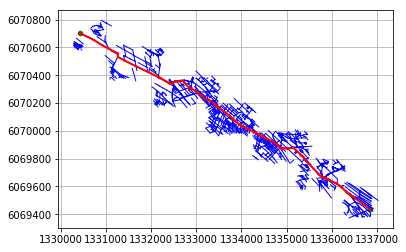

In [7]:
for code in wins:
    for edge in windows[code]:
        x1,y1 = nodexy[edge[0]]
        x2,y2 = nodexy[edge[1]]
        plot([x1,x2],[y1,y2],'-b',linewidth=1)
for i in range(l-1):
    x1,y1 = nodexy[path[i]] 
    x2,y2 = nodexy[path[i+1]]
    plot([x1,x2],[y1,y2],'-r',linewidth=2)
scatter(nodexy[s][0],nodexy[s][1],s=20,c='g')
scatter(nodexy[e][0],nodexy[e][1],s=20,c='g')
grid()
show()